In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error

## Load dataset

In [2]:
dataset = pd.read_csv('data/FuelConsumption.csv')
dataset.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


## Data exploration

In [4]:
clf = dataset[['ENGINESIZE', 'CO2EMISSIONS']]
clf.describe()

,ENGINESIZE,CO2EMISSIONS
count,1067.000000,1067.000000
mean,3.346298,256.228679
std,1.415895,63.372304
min,1.000000,108.000000
25%,2.000000,207.000000
50%,3.400000,251.000000
75%,4.300000,294.000000
max,8.400000,488.000000


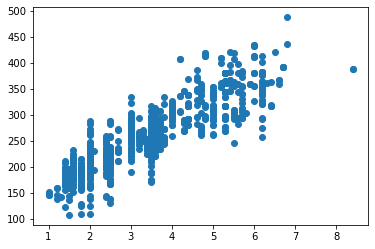

In [7]:
plt.scatter(clf.ENGINESIZE, clf.CO2EMISSIONS)

## Splite dataset

In [9]:
mask = np.random.rand(len(clf)) < 0.85
train_ds = clf[mask]
test_ds = clf[~mask]
print(train_ds.shape, test_ds.shape)

(910, 2) (157, 2)


In [26]:
train_x = np.asanyarray(train_ds[['ENGINESIZE']])
train_y = np.asanyarray(train_ds[['CO2EMISSIONS']])

test_x = np.asanyarray(test_ds[['ENGINESIZE']])
test_y = np.asanyarray(test_ds[['CO2EMISSIONS']])

print(test_x.shape, test_y.shape)
print(train_x.shape, train_y.shape)

(157, 1) (157, 1)
(910, 1) (910, 1)


## Simple linear Regression

In [28]:
simple_linear = LinearRegression()
simple_linear.fit(train_x, train_y)

simple_linear.intercept_, simple_linear.coef_

(array([124.27832513]), array([[39.60041179]]))

In [30]:
simple_linear.intercept_.shape

(1,)

In [31]:
x = np.linspace(1,10,10)
y = simple_linear.coef_[0] * x + simple_linear.intercept_[0]

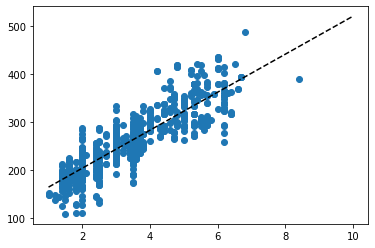

In [32]:
plt.scatter(train_ds.ENGINESIZE, train_ds.CO2EMISSIONS)
plt.plot(x, y, 'k--')

## Polynomial Linear Regression

In [42]:
poly = PolynomialFeatures(degree = 2)
poly_train_x = poly.fit_transform(train_x)
poly_test_x = poly.fit_transform(test_x)

In [43]:
poly_train_x

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24]])

In [46]:
poly_linear_regression = LinearRegression()

poly_linear_regression.fit(poly_train_x, train_y)

poly_linear_regression.coef_, poly_linear_regression.intercept_

(array([[ 0.        , 50.02823097, -1.4030312 ]]), array([107.85445795]))

Text(0, 0.5, 'Emission')

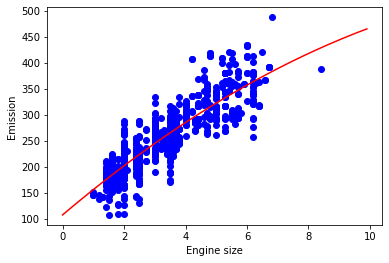

In [48]:
plt.scatter(train_ds.ENGINESIZE, train_ds.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = poly_linear_regression.intercept_[0]+ poly_linear_regression.coef_[0][1]*XX+ poly_linear_regression.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

## Evaluation

In [50]:
y_hat = poly_linear_regression.predict(poly_test_x);

In [ ]:
print("Mean absolute error: %.2f" % mean_absolute_error(test_y, y_h))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )